In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

meteor_chem_chem = pd.read_table('MeTeORFlatFiles/MeTeORchemicalchemical.txt')
meteor_disease_chem = pd.read_table('MeTeORFlatFiles/MeTeORdiseasechemical.txt')
meteor_disease_disease = pd.read_table('MeTeORFlatFiles/MeTeORdiseasedisease.txt')
meteor_disease_gene = pd.read_table('MeTeORFlatFiles/MeTeORdiseasegene.txt')
meteor_gene_chem = pd.read_table('MeTeORFlatFiles/MeTeORgenechemical.txt')
meteor_gene_gene = pd.read_table('MeTeORFlatFiles/MeTeORgenegene.txt')

meteor_disease_gene['EntrezID'] = 'E' + meteor_disease_gene['EntrezID'].astype('str')
meteor_gene_chem['#EntrezID'] = 'E' + meteor_gene_chem['#EntrezID'].astype('str')
meteor_gene_gene['EntrezID'] = 'E' + meteor_gene_gene['EntrezID'].astype('str')
meteor_gene_gene['#EntrezID'] = 'E' + meteor_gene_gene['#EntrezID'].astype('str')

all_dfs = [meteor_chem_chem, meteor_disease_chem, meteor_disease_disease, meteor_disease_gene, meteor_gene_chem, meteor_gene_gene]

for df in all_dfs:
    df.rename(columns={df.columns[0]: 0, df.columns[1]: 1}, inplace=True)

meteor_chem_chem[0] = 'C' + meteor_chem_chem[0].astype('str')
meteor_chem_chem[1] = 'C' + meteor_chem_chem[1].astype('str')
meteor_gene_chem[1] = 'C' + meteor_gene_chem[1].astype('str')
meteor_disease_chem[1] = 'C' + meteor_disease_chem[1].astype('str')

all_dfs = [meteor_chem_chem, meteor_disease_chem, meteor_disease_disease, meteor_disease_gene, meteor_gene_chem, meteor_gene_gene]

edges = pd.concat(all_dfs, ignore_index=True)


In [ ]:
edges['Confidence'] = np.log(edges['Confidence'])

In [11]:
from surprise import Dataset
from surprise import Reader

reader = Reader(rating_scale=(0, 15))
data = Dataset.load_from_df(edges[[0, 1, 'Confidence']], reader)
trainset = data.build_full_trainset()

In [ ]:
from surprise import SVD

algo = SVD()
algo.fit(trainset)

In [14]:
G = nx.from_pandas_edgelist(edges, 0, 1, 'Confidence')

In [15]:
to_remove = [n for n in G.nodes if G.degree[n] < 10]
G.remove_nodes_from(to_remove)

In [20]:
import heapq
import math 

top_hypotheses = []
for i, (a, b) in enumerate(nx.non_edges(G)):
    if i%100000 == 0:
        print(f'Done with {i} hypotheses...')
    confidence = algo.predict(a,b).est
    
    if not top_hypotheses or len(top_hypotheses) < 1000:
        heapq.heappush(top_hypotheses, (confidence, (a, b)))
    
    elif top_hypotheses[0][0] < confidence:
        heapq.heappushpop(top_hypotheses, (confidence, (a, b)))

Done with 0 hypotheses...
Done with 100000 hypotheses...
Done with 200000 hypotheses...
Done with 300000 hypotheses...
Done with 400000 hypotheses...
Done with 500000 hypotheses...
Done with 600000 hypotheses...
Done with 700000 hypotheses...
Done with 800000 hypotheses...
Done with 900000 hypotheses...
Done with 1000000 hypotheses...
Done with 1100000 hypotheses...
Done with 1200000 hypotheses...
Done with 1300000 hypotheses...
Done with 1400000 hypotheses...
Done with 1500000 hypotheses...
Done with 1600000 hypotheses...
Done with 1700000 hypotheses...
Done with 1800000 hypotheses...
Done with 1900000 hypotheses...
Done with 2000000 hypotheses...
Done with 2100000 hypotheses...
Done with 2200000 hypotheses...
Done with 2300000 hypotheses...
Done with 2400000 hypotheses...
Done with 2500000 hypotheses...
Done with 2600000 hypotheses...
Done with 2700000 hypotheses...
Done with 2800000 hypotheses...
Done with 2900000 hypotheses...
Done with 3000000 hypotheses...
Done with 3100000 hypot

Done with 25200000 hypotheses...
Done with 25300000 hypotheses...
Done with 25400000 hypotheses...
Done with 25500000 hypotheses...
Done with 25600000 hypotheses...
Done with 25700000 hypotheses...
Done with 25800000 hypotheses...
Done with 25900000 hypotheses...
Done with 26000000 hypotheses...
Done with 26100000 hypotheses...
Done with 26200000 hypotheses...
Done with 26300000 hypotheses...
Done with 26400000 hypotheses...
Done with 26500000 hypotheses...
Done with 26600000 hypotheses...
Done with 26700000 hypotheses...
Done with 26800000 hypotheses...
Done with 26900000 hypotheses...
Done with 27000000 hypotheses...
Done with 27100000 hypotheses...
Done with 27200000 hypotheses...
Done with 27300000 hypotheses...
Done with 27400000 hypotheses...
Done with 27500000 hypotheses...
Done with 27600000 hypotheses...
Done with 27700000 hypotheses...
Done with 27800000 hypotheses...
Done with 27900000 hypotheses...
Done with 28000000 hypotheses...
Done with 28100000 hypotheses...
Done with 

Done with 50100000 hypotheses...
Done with 50200000 hypotheses...
Done with 50300000 hypotheses...
Done with 50400000 hypotheses...
Done with 50500000 hypotheses...
Done with 50600000 hypotheses...
Done with 50700000 hypotheses...
Done with 50800000 hypotheses...
Done with 50900000 hypotheses...
Done with 51000000 hypotheses...
Done with 51100000 hypotheses...
Done with 51200000 hypotheses...
Done with 51300000 hypotheses...
Done with 51400000 hypotheses...
Done with 51500000 hypotheses...
Done with 51600000 hypotheses...
Done with 51700000 hypotheses...
Done with 51800000 hypotheses...
Done with 51900000 hypotheses...
Done with 52000000 hypotheses...
Done with 52100000 hypotheses...
Done with 52200000 hypotheses...
Done with 52300000 hypotheses...
Done with 52400000 hypotheses...
Done with 52500000 hypotheses...
Done with 52600000 hypotheses...
Done with 52700000 hypotheses...
Done with 52800000 hypotheses...
Done with 52900000 hypotheses...
Done with 53000000 hypotheses...
Done with 

Done with 75000000 hypotheses...
Done with 75100000 hypotheses...
Done with 75200000 hypotheses...
Done with 75300000 hypotheses...
Done with 75400000 hypotheses...
Done with 75500000 hypotheses...
Done with 75600000 hypotheses...
Done with 75700000 hypotheses...
Done with 75800000 hypotheses...
Done with 75900000 hypotheses...
Done with 76000000 hypotheses...
Done with 76100000 hypotheses...
Done with 76200000 hypotheses...
Done with 76300000 hypotheses...
Done with 76400000 hypotheses...
Done with 76500000 hypotheses...
Done with 76600000 hypotheses...
Done with 76700000 hypotheses...
Done with 76800000 hypotheses...
Done with 76900000 hypotheses...
Done with 77000000 hypotheses...
Done with 77100000 hypotheses...
Done with 77200000 hypotheses...
Done with 77300000 hypotheses...
Done with 77400000 hypotheses...
Done with 77500000 hypotheses...
Done with 77600000 hypotheses...
Done with 77700000 hypotheses...
Done with 77800000 hypotheses...
Done with 77900000 hypotheses...
Done with 

Done with 99900000 hypotheses...
Done with 100000000 hypotheses...
Done with 100100000 hypotheses...
Done with 100200000 hypotheses...
Done with 100300000 hypotheses...
Done with 100400000 hypotheses...
Done with 100500000 hypotheses...
Done with 100600000 hypotheses...
Done with 100700000 hypotheses...
Done with 100800000 hypotheses...
Done with 100900000 hypotheses...
Done with 101000000 hypotheses...
Done with 101100000 hypotheses...
Done with 101200000 hypotheses...
Done with 101300000 hypotheses...
Done with 101400000 hypotheses...
Done with 101500000 hypotheses...
Done with 101600000 hypotheses...
Done with 101700000 hypotheses...
Done with 101800000 hypotheses...
Done with 101900000 hypotheses...
Done with 102000000 hypotheses...
Done with 102100000 hypotheses...
Done with 102200000 hypotheses...
Done with 102300000 hypotheses...
Done with 102400000 hypotheses...
Done with 102500000 hypotheses...
Done with 102600000 hypotheses...
Done with 102700000 hypotheses...
Done with 10280

Done with 124000000 hypotheses...
Done with 124100000 hypotheses...
Done with 124200000 hypotheses...
Done with 124300000 hypotheses...
Done with 124400000 hypotheses...
Done with 124500000 hypotheses...
Done with 124600000 hypotheses...
Done with 124700000 hypotheses...
Done with 124800000 hypotheses...
Done with 124900000 hypotheses...
Done with 125000000 hypotheses...
Done with 125100000 hypotheses...
Done with 125200000 hypotheses...
Done with 125300000 hypotheses...
Done with 125400000 hypotheses...
Done with 125500000 hypotheses...
Done with 125600000 hypotheses...
Done with 125700000 hypotheses...
Done with 125800000 hypotheses...
Done with 125900000 hypotheses...
Done with 126000000 hypotheses...
Done with 126100000 hypotheses...
Done with 126200000 hypotheses...
Done with 126300000 hypotheses...
Done with 126400000 hypotheses...
Done with 126500000 hypotheses...
Done with 126600000 hypotheses...
Done with 126700000 hypotheses...
Done with 126800000 hypotheses...
Done with 1269

Done with 148100000 hypotheses...
Done with 148200000 hypotheses...
Done with 148300000 hypotheses...
Done with 148400000 hypotheses...
Done with 148500000 hypotheses...
Done with 148600000 hypotheses...
Done with 148700000 hypotheses...
Done with 148800000 hypotheses...
Done with 148900000 hypotheses...
Done with 149000000 hypotheses...
Done with 149100000 hypotheses...
Done with 149200000 hypotheses...
Done with 149300000 hypotheses...
Done with 149400000 hypotheses...
Done with 149500000 hypotheses...
Done with 149600000 hypotheses...
Done with 149700000 hypotheses...
Done with 149800000 hypotheses...
Done with 149900000 hypotheses...
Done with 150000000 hypotheses...
Done with 150100000 hypotheses...
Done with 150200000 hypotheses...
Done with 150300000 hypotheses...
Done with 150400000 hypotheses...
Done with 150500000 hypotheses...
Done with 150600000 hypotheses...
Done with 150700000 hypotheses...
Done with 150800000 hypotheses...
Done with 150900000 hypotheses...
Done with 1510

Done with 172200000 hypotheses...
Done with 172300000 hypotheses...
Done with 172400000 hypotheses...
Done with 172500000 hypotheses...
Done with 172600000 hypotheses...
Done with 172700000 hypotheses...
Done with 172800000 hypotheses...
Done with 172900000 hypotheses...
Done with 173000000 hypotheses...
Done with 173100000 hypotheses...
Done with 173200000 hypotheses...
Done with 173300000 hypotheses...
Done with 173400000 hypotheses...
Done with 173500000 hypotheses...
Done with 173600000 hypotheses...
Done with 173700000 hypotheses...
Done with 173800000 hypotheses...
Done with 173900000 hypotheses...
Done with 174000000 hypotheses...
Done with 174100000 hypotheses...
Done with 174200000 hypotheses...
Done with 174300000 hypotheses...
Done with 174400000 hypotheses...
Done with 174500000 hypotheses...
Done with 174600000 hypotheses...
Done with 174700000 hypotheses...
Done with 174800000 hypotheses...
Done with 174900000 hypotheses...
Done with 175000000 hypotheses...
Done with 1751

Done with 196300000 hypotheses...
Done with 196400000 hypotheses...
Done with 196500000 hypotheses...
Done with 196600000 hypotheses...
Done with 196700000 hypotheses...
Done with 196800000 hypotheses...
Done with 196900000 hypotheses...
Done with 197000000 hypotheses...
Done with 197100000 hypotheses...
Done with 197200000 hypotheses...
Done with 197300000 hypotheses...
Done with 197400000 hypotheses...
Done with 197500000 hypotheses...
Done with 197600000 hypotheses...
Done with 197700000 hypotheses...
Done with 197800000 hypotheses...
Done with 197900000 hypotheses...
Done with 198000000 hypotheses...
Done with 198100000 hypotheses...
Done with 198200000 hypotheses...
Done with 198300000 hypotheses...
Done with 198400000 hypotheses...
Done with 198500000 hypotheses...
Done with 198600000 hypotheses...
Done with 198700000 hypotheses...
Done with 198800000 hypotheses...
Done with 198900000 hypotheses...
Done with 199000000 hypotheses...
Done with 199100000 hypotheses...
Done with 1992

Done with 220400000 hypotheses...
Done with 220500000 hypotheses...
Done with 220600000 hypotheses...
Done with 220700000 hypotheses...
Done with 220800000 hypotheses...
Done with 220900000 hypotheses...
Done with 221000000 hypotheses...
Done with 221100000 hypotheses...
Done with 221200000 hypotheses...
Done with 221300000 hypotheses...
Done with 221400000 hypotheses...
Done with 221500000 hypotheses...
Done with 221600000 hypotheses...
Done with 221700000 hypotheses...
Done with 221800000 hypotheses...
Done with 221900000 hypotheses...
Done with 222000000 hypotheses...
Done with 222100000 hypotheses...
Done with 222200000 hypotheses...
Done with 222300000 hypotheses...
Done with 222400000 hypotheses...
Done with 222500000 hypotheses...
Done with 222600000 hypotheses...
Done with 222700000 hypotheses...
Done with 222800000 hypotheses...
Done with 222900000 hypotheses...
Done with 223000000 hypotheses...
Done with 223100000 hypotheses...
Done with 223200000 hypotheses...
Done with 2233

Done with 244500000 hypotheses...
Done with 244600000 hypotheses...
Done with 244700000 hypotheses...
Done with 244800000 hypotheses...
Done with 244900000 hypotheses...
Done with 245000000 hypotheses...
Done with 245100000 hypotheses...
Done with 245200000 hypotheses...
Done with 245300000 hypotheses...
Done with 245400000 hypotheses...
Done with 245500000 hypotheses...
Done with 245600000 hypotheses...
Done with 245700000 hypotheses...
Done with 245800000 hypotheses...
Done with 245900000 hypotheses...
Done with 246000000 hypotheses...
Done with 246100000 hypotheses...
Done with 246200000 hypotheses...
Done with 246300000 hypotheses...
Done with 246400000 hypotheses...
Done with 246500000 hypotheses...
Done with 246600000 hypotheses...
Done with 246700000 hypotheses...
Done with 246800000 hypotheses...
Done with 246900000 hypotheses...
Done with 247000000 hypotheses...
Done with 247100000 hypotheses...
Done with 247200000 hypotheses...
Done with 247300000 hypotheses...
Done with 2474

Done with 268600000 hypotheses...
Done with 268700000 hypotheses...
Done with 268800000 hypotheses...
Done with 268900000 hypotheses...
Done with 269000000 hypotheses...
Done with 269100000 hypotheses...
Done with 269200000 hypotheses...
Done with 269300000 hypotheses...
Done with 269400000 hypotheses...
Done with 269500000 hypotheses...
Done with 269600000 hypotheses...
Done with 269700000 hypotheses...
Done with 269800000 hypotheses...
Done with 269900000 hypotheses...
Done with 270000000 hypotheses...
Done with 270100000 hypotheses...
Done with 270200000 hypotheses...
Done with 270300000 hypotheses...
Done with 270400000 hypotheses...
Done with 270500000 hypotheses...
Done with 270600000 hypotheses...
Done with 270700000 hypotheses...
Done with 270800000 hypotheses...
Done with 270900000 hypotheses...
Done with 271000000 hypotheses...
Done with 271100000 hypotheses...
Done with 271200000 hypotheses...
Done with 271300000 hypotheses...
Done with 271400000 hypotheses...
Done with 2715

Done with 292700000 hypotheses...
Done with 292800000 hypotheses...
Done with 292900000 hypotheses...
Done with 293000000 hypotheses...
Done with 293100000 hypotheses...
Done with 293200000 hypotheses...
Done with 293300000 hypotheses...
Done with 293400000 hypotheses...
Done with 293500000 hypotheses...
Done with 293600000 hypotheses...
Done with 293700000 hypotheses...
Done with 293800000 hypotheses...
Done with 293900000 hypotheses...
Done with 294000000 hypotheses...
Done with 294100000 hypotheses...
Done with 294200000 hypotheses...
Done with 294300000 hypotheses...
Done with 294400000 hypotheses...
Done with 294500000 hypotheses...
Done with 294600000 hypotheses...
Done with 294700000 hypotheses...
Done with 294800000 hypotheses...
Done with 294900000 hypotheses...
Done with 295000000 hypotheses...
Done with 295100000 hypotheses...
Done with 295200000 hypotheses...
Done with 295300000 hypotheses...
Done with 295400000 hypotheses...
Done with 295500000 hypotheses...
Done with 2956

Done with 316800000 hypotheses...
Done with 316900000 hypotheses...
Done with 317000000 hypotheses...
Done with 317100000 hypotheses...
Done with 317200000 hypotheses...
Done with 317300000 hypotheses...
Done with 317400000 hypotheses...
Done with 317500000 hypotheses...
Done with 317600000 hypotheses...
Done with 317700000 hypotheses...
Done with 317800000 hypotheses...
Done with 317900000 hypotheses...
Done with 318000000 hypotheses...
Done with 318100000 hypotheses...
Done with 318200000 hypotheses...
Done with 318300000 hypotheses...
Done with 318400000 hypotheses...
Done with 318500000 hypotheses...
Done with 318600000 hypotheses...
Done with 318700000 hypotheses...
Done with 318800000 hypotheses...
Done with 318900000 hypotheses...
Done with 319000000 hypotheses...
Done with 319100000 hypotheses...
Done with 319200000 hypotheses...
Done with 319300000 hypotheses...
Done with 319400000 hypotheses...
Done with 319500000 hypotheses...
Done with 319600000 hypotheses...
Done with 3197

Done with 340900000 hypotheses...
Done with 341000000 hypotheses...
Done with 341100000 hypotheses...
Done with 341200000 hypotheses...
Done with 341300000 hypotheses...
Done with 341400000 hypotheses...
Done with 341500000 hypotheses...
Done with 341600000 hypotheses...
Done with 341700000 hypotheses...
Done with 341800000 hypotheses...
Done with 341900000 hypotheses...
Done with 342000000 hypotheses...
Done with 342100000 hypotheses...
Done with 342200000 hypotheses...
Done with 342300000 hypotheses...
Done with 342400000 hypotheses...
Done with 342500000 hypotheses...
Done with 342600000 hypotheses...
Done with 342700000 hypotheses...
Done with 342800000 hypotheses...
Done with 342900000 hypotheses...
Done with 343000000 hypotheses...
Done with 343100000 hypotheses...
Done with 343200000 hypotheses...
Done with 343300000 hypotheses...
Done with 343400000 hypotheses...
Done with 343500000 hypotheses...
Done with 343600000 hypotheses...
Done with 343700000 hypotheses...
Done with 3438

Done with 365000000 hypotheses...
Done with 365100000 hypotheses...
Done with 365200000 hypotheses...
Done with 365300000 hypotheses...
Done with 365400000 hypotheses...
Done with 365500000 hypotheses...
Done with 365600000 hypotheses...
Done with 365700000 hypotheses...
Done with 365800000 hypotheses...
Done with 365900000 hypotheses...
Done with 366000000 hypotheses...
Done with 366100000 hypotheses...
Done with 366200000 hypotheses...
Done with 366300000 hypotheses...
Done with 366400000 hypotheses...
Done with 366500000 hypotheses...
Done with 366600000 hypotheses...
Done with 366700000 hypotheses...
Done with 366800000 hypotheses...
Done with 366900000 hypotheses...
Done with 367000000 hypotheses...
Done with 367100000 hypotheses...
Done with 367200000 hypotheses...
Done with 367300000 hypotheses...
Done with 367400000 hypotheses...
Done with 367500000 hypotheses...
Done with 367600000 hypotheses...
Done with 367700000 hypotheses...
Done with 367800000 hypotheses...
Done with 3679

Done with 389100000 hypotheses...
Done with 389200000 hypotheses...
Done with 389300000 hypotheses...
Done with 389400000 hypotheses...
Done with 389500000 hypotheses...
Done with 389600000 hypotheses...
Done with 389700000 hypotheses...
Done with 389800000 hypotheses...
Done with 389900000 hypotheses...
Done with 390000000 hypotheses...
Done with 390100000 hypotheses...
Done with 390200000 hypotheses...
Done with 390300000 hypotheses...
Done with 390400000 hypotheses...
Done with 390500000 hypotheses...
Done with 390600000 hypotheses...
Done with 390700000 hypotheses...
Done with 390800000 hypotheses...
Done with 390900000 hypotheses...
Done with 391000000 hypotheses...
Done with 391100000 hypotheses...
Done with 391200000 hypotheses...
Done with 391300000 hypotheses...
Done with 391400000 hypotheses...
Done with 391500000 hypotheses...
Done with 391600000 hypotheses...
Done with 391700000 hypotheses...
Done with 391800000 hypotheses...
Done with 391900000 hypotheses...
Done with 3920

Done with 413200000 hypotheses...
Done with 413300000 hypotheses...
Done with 413400000 hypotheses...
Done with 413500000 hypotheses...
Done with 413600000 hypotheses...
Done with 413700000 hypotheses...
Done with 413800000 hypotheses...
Done with 413900000 hypotheses...
Done with 414000000 hypotheses...
Done with 414100000 hypotheses...
Done with 414200000 hypotheses...
Done with 414300000 hypotheses...
Done with 414400000 hypotheses...
Done with 414500000 hypotheses...
Done with 414600000 hypotheses...
Done with 414700000 hypotheses...
Done with 414800000 hypotheses...
Done with 414900000 hypotheses...
Done with 415000000 hypotheses...
Done with 415100000 hypotheses...
Done with 415200000 hypotheses...
Done with 415300000 hypotheses...
Done with 415400000 hypotheses...
Done with 415500000 hypotheses...
Done with 415600000 hypotheses...
Done with 415700000 hypotheses...
Done with 415800000 hypotheses...
Done with 415900000 hypotheses...
Done with 416000000 hypotheses...
Done with 4161

Done with 437300000 hypotheses...
Done with 437400000 hypotheses...
Done with 437500000 hypotheses...
Done with 437600000 hypotheses...
Done with 437700000 hypotheses...
Done with 437800000 hypotheses...
Done with 437900000 hypotheses...
Done with 438000000 hypotheses...
Done with 438100000 hypotheses...
Done with 438200000 hypotheses...
Done with 438300000 hypotheses...
Done with 438400000 hypotheses...
Done with 438500000 hypotheses...
Done with 438600000 hypotheses...
Done with 438700000 hypotheses...
Done with 438800000 hypotheses...
Done with 438900000 hypotheses...
Done with 439000000 hypotheses...
Done with 439100000 hypotheses...
Done with 439200000 hypotheses...
Done with 439300000 hypotheses...
Done with 439400000 hypotheses...
Done with 439500000 hypotheses...
Done with 439600000 hypotheses...
Done with 439700000 hypotheses...
Done with 439800000 hypotheses...
Done with 439900000 hypotheses...
Done with 440000000 hypotheses...
Done with 440100000 hypotheses...
Done with 4402

Done with 461400000 hypotheses...
Done with 461500000 hypotheses...
Done with 461600000 hypotheses...
Done with 461700000 hypotheses...
Done with 461800000 hypotheses...
Done with 461900000 hypotheses...
Done with 462000000 hypotheses...
Done with 462100000 hypotheses...
Done with 462200000 hypotheses...
Done with 462300000 hypotheses...
Done with 462400000 hypotheses...
Done with 462500000 hypotheses...
Done with 462600000 hypotheses...
Done with 462700000 hypotheses...
Done with 462800000 hypotheses...
Done with 462900000 hypotheses...
Done with 463000000 hypotheses...
Done with 463100000 hypotheses...
Done with 463200000 hypotheses...
Done with 463300000 hypotheses...
Done with 463400000 hypotheses...
Done with 463500000 hypotheses...
Done with 463600000 hypotheses...
Done with 463700000 hypotheses...
Done with 463800000 hypotheses...
Done with 463900000 hypotheses...
Done with 464000000 hypotheses...
Done with 464100000 hypotheses...
Done with 464200000 hypotheses...
Done with 4643

Done with 485500000 hypotheses...
Done with 485600000 hypotheses...
Done with 485700000 hypotheses...
Done with 485800000 hypotheses...
Done with 485900000 hypotheses...
Done with 486000000 hypotheses...
Done with 486100000 hypotheses...
Done with 486200000 hypotheses...
Done with 486300000 hypotheses...
Done with 486400000 hypotheses...
Done with 486500000 hypotheses...
Done with 486600000 hypotheses...
Done with 486700000 hypotheses...
Done with 486800000 hypotheses...
Done with 486900000 hypotheses...
Done with 487000000 hypotheses...
Done with 487100000 hypotheses...
Done with 487200000 hypotheses...
Done with 487300000 hypotheses...
Done with 487400000 hypotheses...
Done with 487500000 hypotheses...
Done with 487600000 hypotheses...
Done with 487700000 hypotheses...
Done with 487800000 hypotheses...
Done with 487900000 hypotheses...
Done with 488000000 hypotheses...
Done with 488100000 hypotheses...
Done with 488200000 hypotheses...
Done with 488300000 hypotheses...
Done with 4884

Done with 509600000 hypotheses...
Done with 509700000 hypotheses...
Done with 509800000 hypotheses...
Done with 509900000 hypotheses...
Done with 510000000 hypotheses...
Done with 510100000 hypotheses...
Done with 510200000 hypotheses...
Done with 510300000 hypotheses...
Done with 510400000 hypotheses...
Done with 510500000 hypotheses...
Done with 510600000 hypotheses...
Done with 510700000 hypotheses...
Done with 510800000 hypotheses...
Done with 510900000 hypotheses...
Done with 511000000 hypotheses...
Done with 511100000 hypotheses...
Done with 511200000 hypotheses...
Done with 511300000 hypotheses...
Done with 511400000 hypotheses...
Done with 511500000 hypotheses...
Done with 511600000 hypotheses...
Done with 511700000 hypotheses...
Done with 511800000 hypotheses...
Done with 511900000 hypotheses...
Done with 512000000 hypotheses...
Done with 512100000 hypotheses...
Done with 512200000 hypotheses...
Done with 512300000 hypotheses...
Done with 512400000 hypotheses...
Done with 5125

Done with 533700000 hypotheses...
Done with 533800000 hypotheses...
Done with 533900000 hypotheses...
Done with 534000000 hypotheses...
Done with 534100000 hypotheses...
Done with 534200000 hypotheses...
Done with 534300000 hypotheses...
Done with 534400000 hypotheses...
Done with 534500000 hypotheses...
Done with 534600000 hypotheses...
Done with 534700000 hypotheses...
Done with 534800000 hypotheses...
Done with 534900000 hypotheses...
Done with 535000000 hypotheses...
Done with 535100000 hypotheses...
Done with 535200000 hypotheses...
Done with 535300000 hypotheses...
Done with 535400000 hypotheses...
Done with 535500000 hypotheses...
Done with 535600000 hypotheses...
Done with 535700000 hypotheses...
Done with 535800000 hypotheses...
Done with 535900000 hypotheses...
Done with 536000000 hypotheses...
Done with 536100000 hypotheses...
Done with 536200000 hypotheses...
Done with 536300000 hypotheses...
Done with 536400000 hypotheses...
Done with 536500000 hypotheses...
Done with 5366

Done with 557800000 hypotheses...
Done with 557900000 hypotheses...
Done with 558000000 hypotheses...
Done with 558100000 hypotheses...
Done with 558200000 hypotheses...
Done with 558300000 hypotheses...
Done with 558400000 hypotheses...
Done with 558500000 hypotheses...
Done with 558600000 hypotheses...
Done with 558700000 hypotheses...
Done with 558800000 hypotheses...
Done with 558900000 hypotheses...
Done with 559000000 hypotheses...
Done with 559100000 hypotheses...
Done with 559200000 hypotheses...
Done with 559300000 hypotheses...
Done with 559400000 hypotheses...
Done with 559500000 hypotheses...
Done with 559600000 hypotheses...
Done with 559700000 hypotheses...
Done with 559800000 hypotheses...
Done with 559900000 hypotheses...
Done with 560000000 hypotheses...
Done with 560100000 hypotheses...
Done with 560200000 hypotheses...
Done with 560300000 hypotheses...
Done with 560400000 hypotheses...
Done with 560500000 hypotheses...
Done with 560600000 hypotheses...
Done with 5607

Done with 581900000 hypotheses...
Done with 582000000 hypotheses...
Done with 582100000 hypotheses...
Done with 582200000 hypotheses...
Done with 582300000 hypotheses...
Done with 582400000 hypotheses...
Done with 582500000 hypotheses...
Done with 582600000 hypotheses...
Done with 582700000 hypotheses...
Done with 582800000 hypotheses...
Done with 582900000 hypotheses...
Done with 583000000 hypotheses...
Done with 583100000 hypotheses...
Done with 583200000 hypotheses...
Done with 583300000 hypotheses...
Done with 583400000 hypotheses...
Done with 583500000 hypotheses...
Done with 583600000 hypotheses...
Done with 583700000 hypotheses...
Done with 583800000 hypotheses...
Done with 583900000 hypotheses...
Done with 584000000 hypotheses...
Done with 584100000 hypotheses...
Done with 584200000 hypotheses...
Done with 584300000 hypotheses...
Done with 584400000 hypotheses...
Done with 584500000 hypotheses...
Done with 584600000 hypotheses...
Done with 584700000 hypotheses...
Done with 5848

Done with 606000000 hypotheses...
Done with 606100000 hypotheses...
Done with 606200000 hypotheses...
Done with 606300000 hypotheses...
Done with 606400000 hypotheses...
Done with 606500000 hypotheses...
Done with 606600000 hypotheses...
Done with 606700000 hypotheses...
Done with 606800000 hypotheses...
Done with 606900000 hypotheses...
Done with 607000000 hypotheses...
Done with 607100000 hypotheses...
Done with 607200000 hypotheses...
Done with 607300000 hypotheses...
Done with 607400000 hypotheses...
Done with 607500000 hypotheses...
Done with 607600000 hypotheses...
Done with 607700000 hypotheses...
Done with 607800000 hypotheses...
Done with 607900000 hypotheses...
Done with 608000000 hypotheses...
Done with 608100000 hypotheses...
Done with 608200000 hypotheses...
Done with 608300000 hypotheses...
Done with 608400000 hypotheses...
Done with 608500000 hypotheses...
Done with 608600000 hypotheses...
Done with 608700000 hypotheses...
Done with 608800000 hypotheses...
Done with 6089

Done with 630100000 hypotheses...
Done with 630200000 hypotheses...
Done with 630300000 hypotheses...
Done with 630400000 hypotheses...
Done with 630500000 hypotheses...
Done with 630600000 hypotheses...
Done with 630700000 hypotheses...
Done with 630800000 hypotheses...
Done with 630900000 hypotheses...
Done with 631000000 hypotheses...
Done with 631100000 hypotheses...
Done with 631200000 hypotheses...
Done with 631300000 hypotheses...
Done with 631400000 hypotheses...
Done with 631500000 hypotheses...
Done with 631600000 hypotheses...
Done with 631700000 hypotheses...
Done with 631800000 hypotheses...
Done with 631900000 hypotheses...
Done with 632000000 hypotheses...
Done with 632100000 hypotheses...
Done with 632200000 hypotheses...
Done with 632300000 hypotheses...
Done with 632400000 hypotheses...
Done with 632500000 hypotheses...
Done with 632600000 hypotheses...
Done with 632700000 hypotheses...
Done with 632800000 hypotheses...
Done with 632900000 hypotheses...
Done with 6330

Done with 654200000 hypotheses...
Done with 654300000 hypotheses...
Done with 654400000 hypotheses...
Done with 654500000 hypotheses...
Done with 654600000 hypotheses...
Done with 654700000 hypotheses...
Done with 654800000 hypotheses...
Done with 654900000 hypotheses...
Done with 655000000 hypotheses...
Done with 655100000 hypotheses...
Done with 655200000 hypotheses...
Done with 655300000 hypotheses...
Done with 655400000 hypotheses...
Done with 655500000 hypotheses...
Done with 655600000 hypotheses...
Done with 655700000 hypotheses...
Done with 655800000 hypotheses...
Done with 655900000 hypotheses...
Done with 656000000 hypotheses...
Done with 656100000 hypotheses...
Done with 656200000 hypotheses...
Done with 656300000 hypotheses...
Done with 656400000 hypotheses...
Done with 656500000 hypotheses...
Done with 656600000 hypotheses...
Done with 656700000 hypotheses...
Done with 656800000 hypotheses...
Done with 656900000 hypotheses...
Done with 657000000 hypotheses...
Done with 6571

Done with 678300000 hypotheses...
Done with 678400000 hypotheses...
Done with 678500000 hypotheses...
Done with 678600000 hypotheses...
Done with 678700000 hypotheses...
Done with 678800000 hypotheses...
Done with 678900000 hypotheses...
Done with 679000000 hypotheses...
Done with 679100000 hypotheses...
Done with 679200000 hypotheses...
Done with 679300000 hypotheses...
Done with 679400000 hypotheses...
Done with 679500000 hypotheses...
Done with 679600000 hypotheses...
Done with 679700000 hypotheses...
Done with 679800000 hypotheses...
Done with 679900000 hypotheses...
Done with 680000000 hypotheses...
Done with 680100000 hypotheses...
Done with 680200000 hypotheses...
Done with 680300000 hypotheses...
Done with 680400000 hypotheses...
Done with 680500000 hypotheses...
Done with 680600000 hypotheses...
Done with 680700000 hypotheses...
Done with 680800000 hypotheses...
Done with 680900000 hypotheses...
Done with 681000000 hypotheses...
Done with 681100000 hypotheses...
Done with 6812

Done with 702400000 hypotheses...
Done with 702500000 hypotheses...
Done with 702600000 hypotheses...
Done with 702700000 hypotheses...
Done with 702800000 hypotheses...
Done with 702900000 hypotheses...
Done with 703000000 hypotheses...
Done with 703100000 hypotheses...
Done with 703200000 hypotheses...
Done with 703300000 hypotheses...
Done with 703400000 hypotheses...
Done with 703500000 hypotheses...
Done with 703600000 hypotheses...
Done with 703700000 hypotheses...
Done with 703800000 hypotheses...
Done with 703900000 hypotheses...
Done with 704000000 hypotheses...
Done with 704100000 hypotheses...
Done with 704200000 hypotheses...
Done with 704300000 hypotheses...
Done with 704400000 hypotheses...
Done with 704500000 hypotheses...
Done with 704600000 hypotheses...
Done with 704700000 hypotheses...
Done with 704800000 hypotheses...
Done with 704900000 hypotheses...
Done with 705000000 hypotheses...
Done with 705100000 hypotheses...
Done with 705200000 hypotheses...
Done with 7053

Done with 726500000 hypotheses...
Done with 726600000 hypotheses...
Done with 726700000 hypotheses...
Done with 726800000 hypotheses...
Done with 726900000 hypotheses...
Done with 727000000 hypotheses...
Done with 727100000 hypotheses...
Done with 727200000 hypotheses...
Done with 727300000 hypotheses...
Done with 727400000 hypotheses...
Done with 727500000 hypotheses...
Done with 727600000 hypotheses...
Done with 727700000 hypotheses...
Done with 727800000 hypotheses...
Done with 727900000 hypotheses...
Done with 728000000 hypotheses...
Done with 728100000 hypotheses...
Done with 728200000 hypotheses...
Done with 728300000 hypotheses...
Done with 728400000 hypotheses...
Done with 728500000 hypotheses...
Done with 728600000 hypotheses...
Done with 728700000 hypotheses...
Done with 728800000 hypotheses...
Done with 728900000 hypotheses...
Done with 729000000 hypotheses...
Done with 729100000 hypotheses...
Done with 729200000 hypotheses...
Done with 729300000 hypotheses...
Done with 7294

Done with 750600000 hypotheses...
Done with 750700000 hypotheses...
Done with 750800000 hypotheses...
Done with 750900000 hypotheses...
Done with 751000000 hypotheses...
Done with 751100000 hypotheses...
Done with 751200000 hypotheses...
Done with 751300000 hypotheses...
Done with 751400000 hypotheses...
Done with 751500000 hypotheses...
Done with 751600000 hypotheses...
Done with 751700000 hypotheses...
Done with 751800000 hypotheses...
Done with 751900000 hypotheses...
Done with 752000000 hypotheses...
Done with 752100000 hypotheses...
Done with 752200000 hypotheses...
Done with 752300000 hypotheses...
Done with 752400000 hypotheses...
Done with 752500000 hypotheses...
Done with 752600000 hypotheses...
Done with 752700000 hypotheses...
Done with 752800000 hypotheses...
Done with 752900000 hypotheses...
Done with 753000000 hypotheses...
Done with 753100000 hypotheses...
Done with 753200000 hypotheses...
Done with 753300000 hypotheses...
Done with 753400000 hypotheses...
Done with 7535

Done with 774700000 hypotheses...
Done with 774800000 hypotheses...
Done with 774900000 hypotheses...
Done with 775000000 hypotheses...
Done with 775100000 hypotheses...
Done with 775200000 hypotheses...
Done with 775300000 hypotheses...
Done with 775400000 hypotheses...
Done with 775500000 hypotheses...
Done with 775600000 hypotheses...
Done with 775700000 hypotheses...
Done with 775800000 hypotheses...
Done with 775900000 hypotheses...
Done with 776000000 hypotheses...
Done with 776100000 hypotheses...
Done with 776200000 hypotheses...
Done with 776300000 hypotheses...
Done with 776400000 hypotheses...
Done with 776500000 hypotheses...
Done with 776600000 hypotheses...
Done with 776700000 hypotheses...
Done with 776800000 hypotheses...
Done with 776900000 hypotheses...
Done with 777000000 hypotheses...
Done with 777100000 hypotheses...
Done with 777200000 hypotheses...
Done with 777300000 hypotheses...
Done with 777400000 hypotheses...
Done with 777500000 hypotheses...
Done with 7776

Done with 798800000 hypotheses...
Done with 798900000 hypotheses...
Done with 799000000 hypotheses...
Done with 799100000 hypotheses...
Done with 799200000 hypotheses...
Done with 799300000 hypotheses...
Done with 799400000 hypotheses...
Done with 799500000 hypotheses...
Done with 799600000 hypotheses...
Done with 799700000 hypotheses...
Done with 799800000 hypotheses...
Done with 799900000 hypotheses...
Done with 800000000 hypotheses...
Done with 800100000 hypotheses...
Done with 800200000 hypotheses...
Done with 800300000 hypotheses...
Done with 800400000 hypotheses...
Done with 800500000 hypotheses...
Done with 800600000 hypotheses...
Done with 800700000 hypotheses...
Done with 800800000 hypotheses...
Done with 800900000 hypotheses...
Done with 801000000 hypotheses...
Done with 801100000 hypotheses...
Done with 801200000 hypotheses...
Done with 801300000 hypotheses...
Done with 801400000 hypotheses...
Done with 801500000 hypotheses...
Done with 801600000 hypotheses...
Done with 8017

In [7]:
results = [(math.e**a, b, c) for (a, b,c) in top_hypotheses]

In [8]:
import csv
with open('svd.csv','w') as out:
    csv_out=csv.writer(out)
    for row in results:
        csv_out.writerow(row)


In [12]:
confidence, _, _ = list(zip(*top_hypotheses))

In [13]:
top_hypotheses

[(296.7815081784802, 'D010146', 'C36511'),
 (244.62510496273268, 'C16133935', 'D004195'),
 (243.30607859933662, 'C4713', 'D020022'),
 (227.55070911367727, 'C6128', 'D000568'),
 (208.07738398659632, 'C5280343', 'D020022'),
 (197.19971446924993, 'D000208', 'C2094'),
 (188.41761678167512, 'C6325', 'D004195'),
 (179.35742052590285, 'C134664', 'D001145'),
 (178.81827609849455, 'C11979415', 'D004195'),
 (172.12758981710166, 'C14833', 'D011183'),
 (171.7928019755188, 'C131673831', 'D020022'),
 (145.32415588197642, 'E115653', 'D004195'),
 (143.1209233852953, 'C104741', 'D020022'),
 (141.51079839444762, 'C6917794', 'D011183'),
 (140.27008748878004, 'C9964', 'D004195'),
 (137.14779287071437, 'C5288798', 'D020022'),
 (134.43733776748775, 'C176155', 'D020022'),
 (133.84855940287048, 'C104805', 'D011183'),
 (129.81865486198333, 'C24831714', 'D004195'),
 (127.0619232115305, 'C25517', 'D020022'),
 (126.60018938992269, 'C21896651', 'D002102'),
 (124.4364480674347, 'C23957', 'D004194'),
 (121.829209546

Text(0.5, 1.0, 'Confidence Estimates Using SVD')

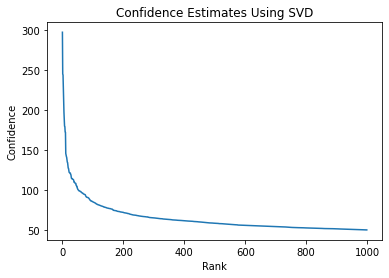

In [17]:
import matplotlib.pyplot as plt
plt.plot(confidence)
plt.xlabel('Rank')
plt.ylabel('Confidence')
plt.title('Confidence Estimates Using SVD')